## Chapter 01. 导论
### 1.1 数据的威力
生活中，数据无处不在。

### 1.2 什么是数据科学
数据科学家是能够从混乱数据中剥离出洞见的人。

### 1.3 激励假设：DataSciencester
在本书中，我们通过解决在工作中碰到的一个个问题，来学习数据科学的思想。我们有时会直接研究用户提供的数据，有时会研究用户与网站互动生成的数据，有时研究从我们自己设计的实验中获得的数据。

#### 1.3.1 寻找关键联系人
第一， 他需要你识别出数据科学家中的“关键联系人”。 以下DataSciencester所有用户的网络关系数据：

In [1]:
from __future__ import division
from collections import Counter
from collections import defaultdict
from matplotlib import pyplot as plt

users = [
    { "id": 0, "name": "Hero" },
    { "id": 1, "name": "Dunn" },
    { "id": 2, "name": "Sue" },
    { "id": 3, "name": "Chi" },
    { "id": 4, "name": "Thor" },
    { "id": 5, "name": "Clive" },
    { "id": 6, "name": "Hicks" },
    { "id": 7, "name": "Devin" },
    { "id": 8, "name": "Kate" },
    { "id": 9, "name": "Klein" },
    { "id": 10, "name": "Jen" }
]

以下是“友邻关系”数据列表。这个列表的元素是成对的id，比如说，元组(0,1)表示id为0的数据科学家Hero和id为1的数据科学家Dunn是朋友：

In [2]:
friendships = [(0, 1), (0, 2), (1, 2), (1, 3), (2, 3), (3, 4),
               (4, 5), (5, 6), (5, 7), (6, 8), (7, 8), (8, 9)]

我们希望每个用户增加一个朋友列表:

In [3]:
# first give each user an empty list
for user in users:
    user["friends"] = []

# and then populate the lists with friendships
for i, j in friendships:
    # this works because users[i] is the user whose id is i
    users[i]["friends"].append(users[j]) # add i as a friend of j
    users[j]["friends"].append(users[i]) # add j as a friend of i

计算出全部的联系数，这需要对所有用户的 friends 列表的长度求和：

In [4]:
# get length of friend_ids list
def number_of_friends(user):
    return len(user["friends"]) 

# 总的连接数
total_connections = sum(number_of_friends(user) for user in users)
total_connections

24

In [5]:
# 平均每个用户的连接数
num_users = len(users)
avg_connections = total_connections / num_users
avg_connections

2.1818181818181817

按照朋友数的多少排序：

In [6]:
num_friends_by_id = [(user["id"], number_of_friends(user)) for user in users]
num_friends_by_id = sorted(num_friends_by_id, key=lambda pair: pair[1], reverse=True)
num_friends_by_id

[(1, 3),
 (2, 3),
 (3, 3),
 (5, 3),
 (8, 3),
 (0, 2),
 (4, 2),
 (6, 2),
 (7, 2),
 (9, 1),
 (10, 0)]

#### 1.3.2 你可能知道的数据科学家
寻找某人朋友的朋友，即某人有可能想认识的人。

In [7]:
# two users are not the same if they have different ids
def not_the_same(user, other_user):
    return user["id"] != other_user["id"]

# other_user is not a friend if he's not in user["friends"];
# that is, if he's not_the_same as all the people in user["friends"]"""
def not_friends(user, other_user):
    return all(not_the_same(friend, other_user) for friend in user["friends"])

def friends_of_friend_ids(user):
    return Counter(foaf["id"]
                   for friend in user["friends"]  # for each of my friends
                   for foaf in friend["friends"]  # count *their* friends
                   if not_the_same(user, foaf)    # who aren't me
                   and not_friends(user, foaf))   # and aren't my friends

friends_of_friend_ids(users[3])

Counter({0: 2, 5: 1})

结果表明：Chi（id为3）和 Hero（id为0）有两个共同的朋友，和 Clive（id为5）有一个共同的朋友。

出于一个数据科学家的直觉，你可能会喜欢结交有共同兴趣的人。以下是用户兴趣列表：

In [8]:
interests = [
    (0, "Hadoop"), (0, "Big Data"), (0, "HBase"), (0, "Java"), (0, "Spark"), (0, "Storm"), (0, "Cassandra"),
    (1, "NoSQL"), (1, "MongoDB"), (1, "Cassandra"), (1, "HBase"), (1, "Postgres"), (2, "Python"), (2, "scikit-learn"), (2, "scipy"),
    (2, "numpy"), (2, "statsmodels"), (2, "pandas"), (3, "R"), (3, "Python"),
    (3, "statistics"), (3, "regression"), (3, "probability"),
    (4, "machine learning"), (4, "regression"), (4, "decision trees"), (4, "libsvm"), 
    (5, "Python"), (5, "R"), (5, "Java"), (5, "C++"), (5, "Haskell"), (5, "programming languages"), 
    (6, "statistics"), (6, "probability"), (6, "mathematics"), (6, "theory"),
    (7, "machine learning"), (7, "scikit-learn"), (7, "Mahout"), (7, "neural networks"), (8, "neural networks"), 
    (8, "deep learning"), (8, "Big Data"), (8, "artificial intelligence"), 
    (9, "Hadoop"), (9, "Java"), (9, "MapReduce"), (9, "Big Data")
]

找出对某种事物有共同爱好的用户，很容易设计出相应的函数：

In [9]:
def data_scientists_who_like(target_interest):
    return [user_id
            for user_id, user_interest in interests
            if user_interest == target_interest]

data_scientists_who_like("Java")

[0, 5, 9]

上面的算法每次搜索都需要遍历整个兴趣列表，如果用户很多或者用户的兴趣很多，这种算法的时间和空间成本会很大，因此最好能建立一个从兴趣到用户的索引直接搜索：

In [10]:
# keys are interests, values are lists of user_ids with that interest
user_ids_by_interest = defaultdict(list)

for user_id, interest in interests:
    user_ids_by_interest[interest].append(user_id)

# keys are user_ids, values are lists of interests for that user_id
interests_by_user_id = defaultdict(list)

for user_id, interest in interests:
    interests_by_user_id[user_id].append(interest)

给定一个用户，可以方便地找到与他共同爱好最多的用户：

In [11]:
def most_common_interests_with(user_id):
    return Counter(interested_user_id
        for interest in interests_by_user_id[user_id]
        for interested_user_id in user_ids_by_interest[interest]
        if interested_user_id != user_id)

most_common_interests_with(0)

Counter({1: 2, 5: 1, 8: 1, 9: 3})

#### 1.3.3 工资与工作年限
以下是一份匿名文件，其中包含每位用户的工资（salary）和作为数据科学家的工作年限（tenure）：

In [12]:
salaries_and_tenures = [(83000, 8.7), (88000, 8.1),
                        (48000, 0.7), (76000, 6),
                        (69000, 6.5), (76000, 7.5),
                        (60000, 2.5), (83000, 10),
                        (48000, 1.9), (63000, 4.2)]

可视化收入与工作年限的关系：

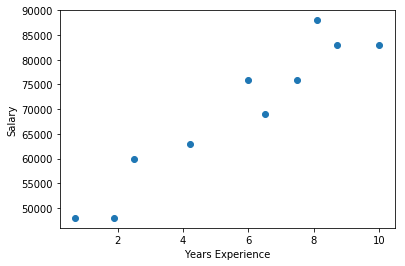

In [13]:
def make_chart_salaries_by_tenure():
    tenures = [tenure for salary, tenure in salaries_and_tenures]
    salaries = [salary for salary, tenure in salaries_and_tenures]
    plt.scatter(tenures, salaries)
    plt.xlabel("Years Experience")
    plt.ylabel("Salary")
    plt.show()

make_chart_salaries_by_tenure()

年均收入：

In [14]:
# keys are years, values are the salaries for each tenure
salary_by_tenure = defaultdict(list)

for salary, tenure in salaries_and_tenures:
    salary_by_tenure[tenure].append(salary)

average_salary_by_tenure = {
    tenure : sum(salaries) / len(salaries)
    for tenure, salaries in salary_by_tenure.items()
}

average_salary_by_tenure

{0.7: 48000.0,
 1.9: 48000.0,
 2.5: 60000.0,
 4.2: 63000.0,
 6: 76000.0,
 6.5: 69000.0,
 7.5: 76000.0,
 8.1: 88000.0,
 8.7: 83000.0,
 10: 83000.0}

实际上，任何两个用户都没有相同的工作年限，所以上述计算结果作用有限，它仅仅说明了每个用户独立的收入。

一个更有意义的计算方式是把用户的工作年限分组：

In [15]:
def tenure_bucket(tenure):
    if tenure < 2: return "less than two"
    elif tenure < 5: return "between two and five"
    else: return "more than five"

salary_by_tenure_bucket = defaultdict(list)

for salary, tenure in salaries_and_tenures:
    bucket = tenure_bucket(tenure)
    salary_by_tenure_bucket[bucket].append(salary)

average_salary_by_bucket = {
    tenure_bucket : sum(salaries) / len(salaries)
    for tenure_bucket, salaries in salary_by_tenure_bucket.items()
}

average_salary_by_bucket

{'between two and five': 61500.0,
 'less than two': 48000.0,
 'more than five': 79166.66666666667}

#### 1.3.4 付费账户
那些新手和资历很深的用户倾向于付费，而那些具有中等工作年限的用户则倾向于不付费。

由此，如果你打算创建一个模型——尽管这点数据对创建模型肯定是不够的——你会试图对新手和资深用户预测“付费”，而对具有中等工作年限的用户预测“不付费”：

In [16]:
def predict_paid_or_unpaid(years_experience):
    if years_experience < 3.0: return "paid"
    elif years_experience < 8.5: return "unpaid"
    else: return "paid"

#### 1.3.5 兴趣主题
当你正准备结束第一天的工作时，内容策略部门的副总来向你要数据，想了解什么样的主题更令用户感兴趣，以便据此规划他的博客日历。一种简单（但并不激动人心）的方法是仅仅数一下兴趣词汇的个数：

In [17]:
words_and_counts = Counter(word
                           for user, interest in interests
                           for word in interest.lower().split())

words_and_counts

Counter({'artificial': 1,
         'big': 3,
         'c++': 1,
         'cassandra': 2,
         'data': 3,
         'decision': 1,
         'deep': 1,
         'hadoop': 2,
         'haskell': 1,
         'hbase': 2,
         'intelligence': 1,
         'java': 3,
         'languages': 1,
         'learning': 3,
         'libsvm': 1,
         'machine': 2,
         'mahout': 1,
         'mapreduce': 1,
         'mathematics': 1,
         'mongodb': 1,
         'networks': 2,
         'neural': 2,
         'nosql': 1,
         'numpy': 1,
         'pandas': 1,
         'postgres': 1,
         'probability': 2,
         'programming': 1,
         'python': 3,
         'r': 2,
         'regression': 2,
         'scikit-learn': 2,
         'scipy': 1,
         'spark': 1,
         'statistics': 2,
         'statsmodels': 1,
         'storm': 1,
         'theory': 1,
         'trees': 1})

In [19]:
for word, count in words_and_counts.most_common():
    if count > 1:
        print(word, count)

java 3
data 3
big 3
python 3
learning 3
machine 2
cassandra 2
regression 2
statistics 2
neural 2
hbase 2
r 2
hadoop 2
scikit-learn 2
networks 2
probability 2
